### HR Budget Optimization Model
**Objectvie**  
$$ Minimize \sum_{d \in D} \sum_{r \in R_{d}}B_{d,r}$$         
Here, $B_{d,r}$is the budget allocated for role $r$ in department $d$. 
The total budget is the sum of the budgets for all roles in all departments.  

**Constraints**            
1. Employee Satisfaction Constraint      
$$S_{d,r,g} \ge S_{min} \quad \forall d \in D, r \in R_{d}, g \in G $$    
$S_{d,r,g}$ is the satisfaction score for role $r$ in department $d$ for demographic group $g$.       
​$S_{min}$ is the minimum acceptable satisfaction score.      
2. Headcount Balance      
$$\sum_{r \in R_{d}} H_{d,r} = H_{d} \quad \forall d \in D$$      
$H_{d,r}$ is the headcount for role $r$ in department $d$.          
$H_{d}$ is the total headcount required for department $d$.     
3. Attrition Impact
$$A_{d,r} \times H_{d,r} \le attrition_threshold \quad \forall d \in D, r \in R_{d}$$     
$A_{d,r}$ is the attrition rate for role $r$ in department $d$.           
The attrition impact is calculated by multiplying the attrition rate by the headcount for each role.        
attrition_threshold is the maximum acceptable attrition impact.        





### Loading the data & libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt # for plotting visualizations
import seaborn as sns # for plotting visualizations
df = pd.read_csv('Employee_Attrition.csv')

### Reviewing Sata Structure

In [28]:
df.head(0)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [30]:
#check for missing values
df.isnull().sum()
#three ways to handle missing values
#1.Removing rows/columns with missing values
#2.Filling missing values with a specific value (e.g., mean, median, mode)
#3.Imputing missing values based on other data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [31]:
#check for duplicates
df.duplicated().sum()

0

In [4]:
# convert data type 'MonthlyIncome' to float
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)


In [5]:
#check for outliers by IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Align the DataFrame with the Series
data_aligned, Q1_aligned = df.align(Q1, axis=1, copy=False)
data_aligned, Q3_aligned = df.align(Q3, axis=1, copy=False)
data_aligned, IQR_aligned = df.align(IQR, axis=1, copy=False)
#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Identify outliers
is_outlier = (data_aligned < (Q1_aligned - 1.5 * IQR_aligned)) | (data_aligned > (Q3_aligned + 1.5 * IQR_aligned))

# Filter out rows with outliers
df = df[~is_outlier.any(axis=1)]

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,...,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,35.332478,803.163030,9.428755,2.890886,1.0,1038.517330,2.727856,66.060334,2.740693,1.750963,...,2.699615,80.0,0.666239,8.956354,2.522465,2.752246,5.391528,3.563543,1.422336,3.512195
std,8.556548,401.254015,8.179603,1.020185,0.0,598.193343,1.080504,20.509768,0.711293,0.751765,...,1.086083,0.0,0.694471,5.249130,0.754044,0.716303,3.650824,3.029335,1.971536,3.047320
min,18.000000,103.000000,1.000000,1.000000,1.0,4.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,468.500000,2.000000,2.000000,1.0,507.500000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,34.000000,809.000000,7.000000,3.000000,1.0,1018.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,9.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,40.000000,1155.500000,15.000000,4.000000,1.0,1568.500000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,4.000000,...,4.000000,80.0,2.000000,28.000000,4.000000,4.000000,18.000000,14.000000,7.000000,13.000000


In [10]:
#convert data types if necessary
df.loc[:, 'Gender_Numeric'] = df['Gender'].map({'male': 1, 'female': 0})
df.loc[:, 'MaritalStatus_Numeric'] = df['MaritalStatus'].map({'single': 0, 'married': 1, 'divorced': 2})
df.loc[:, 'OverTime_Numeric'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df.loc[:, 'Attrition_Numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.loc[:, 'BusinessTravel_Numeric'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df.loc[:, 'Department_Numeric'] = df['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
df.loc[:, 'EducationField_Numeric'] = df['EducationField'].map({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5})
df.loc[:, 'JobRole_Numeric'] = df['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8})
df_types = df.dtypes
df_types


Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [13]:
cleaned_data = df.head()
cleaned_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Numeric,MaritalStatus_Numeric,OverTime_Numeric,Attrition_Numeric,BusinessTravel_Numeric,Department_Numeric,EducationField_Numeric,JobRole_Numeric
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,NaN,NaN,1,1,1,1,5,2
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,NaN,NaN,1,0,2,1,0,1
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,6,NaN,NaN,0,0,2,1,0,2
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,7,7,NaN,NaN,0,0,1,1,1,4
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,0,8,NaN,NaN,1,0,1,1,0,2


### Descriptive Analysis       
#### Statistical summary     

In [12]:
# statistical summary
summary_states = df.describe()
summary_states

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Numeric,MaritalStatus_Numeric,OverTime_Numeric,Attrition_Numeric,BusinessTravel_Numeric,Department_Numeric,EducationField_Numeric,JobRole_Numeric
count,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,779.000000,779.000000,779.000000,779.000000,...,779.000000,779.000000,0.0,0.0,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,35.332478,803.163030,9.428755,2.890886,1.0,1038.517330,2.727856,66.060334,2.740693,1.750963,...,1.422336,3.512195,NaN,NaN,0.290116,0.177150,1.097561,0.711168,1.249037,2.251605
std,8.556548,401.254015,8.179603,1.020185,0.0,598.193343,1.080504,20.509768,0.711293,0.751765,...,1.971536,3.047320,NaN,NaN,0.454107,0.382041,0.527624,0.536595,1.467596,2.230510
min,18.000000,103.000000,1.000000,1.000000,1.0,4.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,468.500000,2.000000,2.000000,1.0,507.500000,2.000000,48.000000,2.000000,1.000000,...,0.000000,2.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,34.000000,809.000000,7.000000,3.000000,1.0,1018.000000,3.000000,66.000000,3.000000,2.000000,...,1.000000,2.000000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
75%,40.000000,1155.500000,15.000000,4.000000,1.0,1568.500000,4.000000,84.000000,3.000000,2.000000,...,2.000000,7.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,2.000000,3.000000
max,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,4.000000,...,7.000000,13.000000,NaN,NaN,1.000000,1.000000,2.000000,2.000000,5.000000,8.000000


#### Distribution of numerical variables Analysis

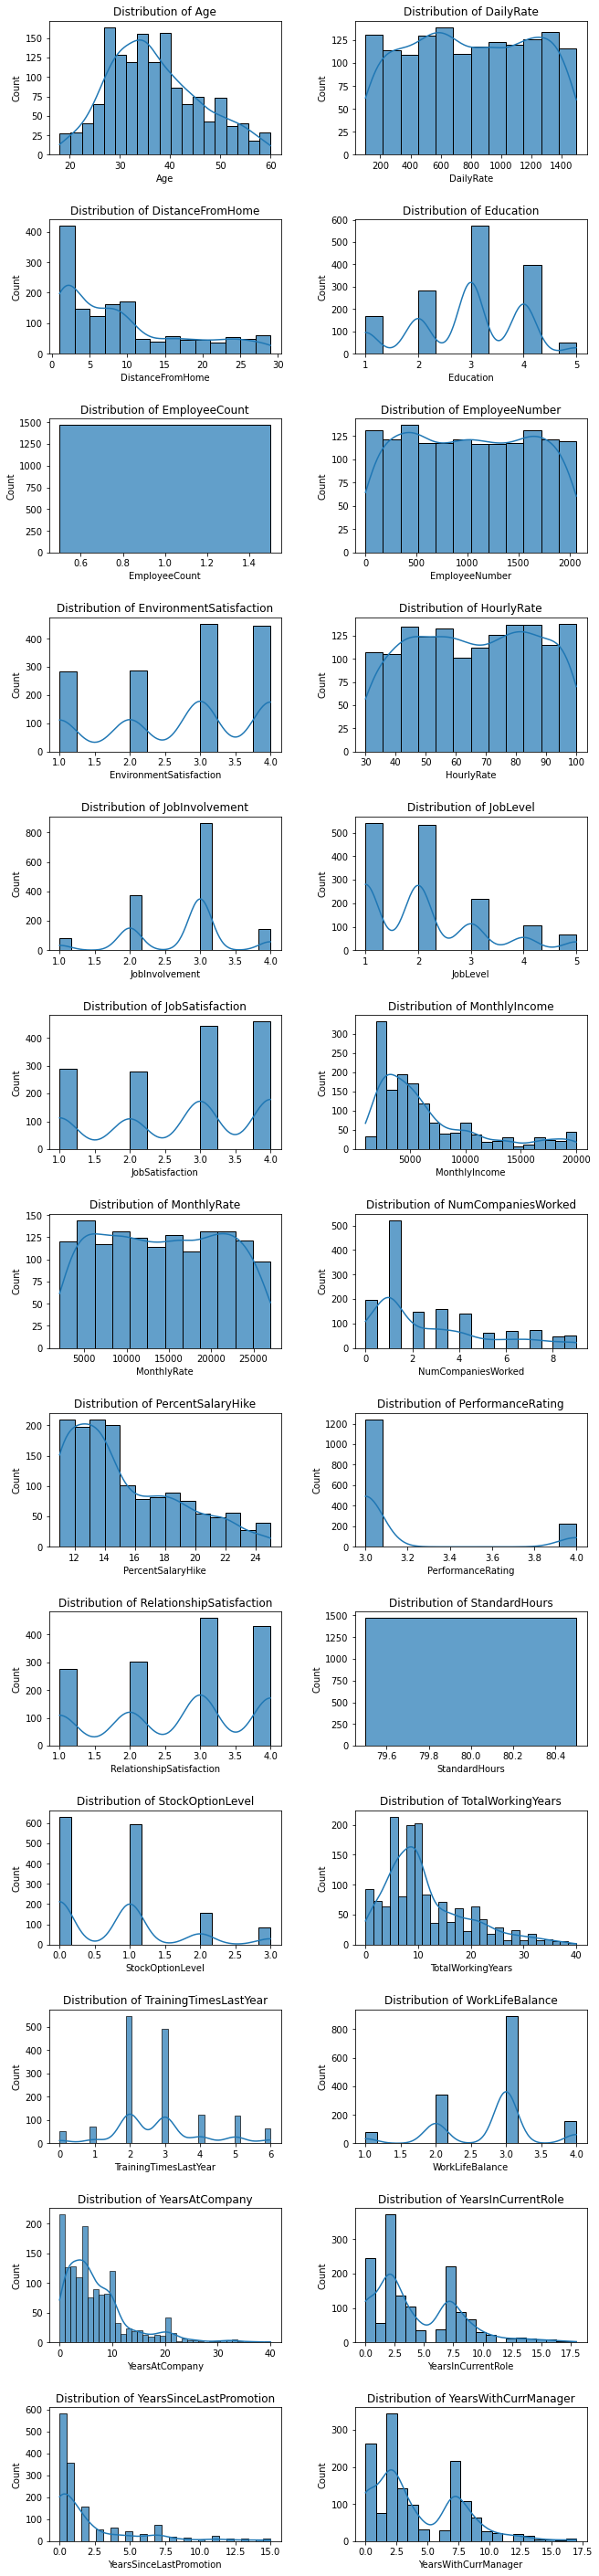

In [68]:
# visualize the distribution of key numerical variables using histograms
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical variables
fig, axes = plt.subplots((len(numerical_columns)+1)//2, 2, figsize=(10, 40))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], ax=axes[i//2, i%2], alpha=0.7, kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {column}') 
    # set x-axis label
    axes[i//2, i%2].set_xlabel(column)

plt.show()

#### Correlation Analysis

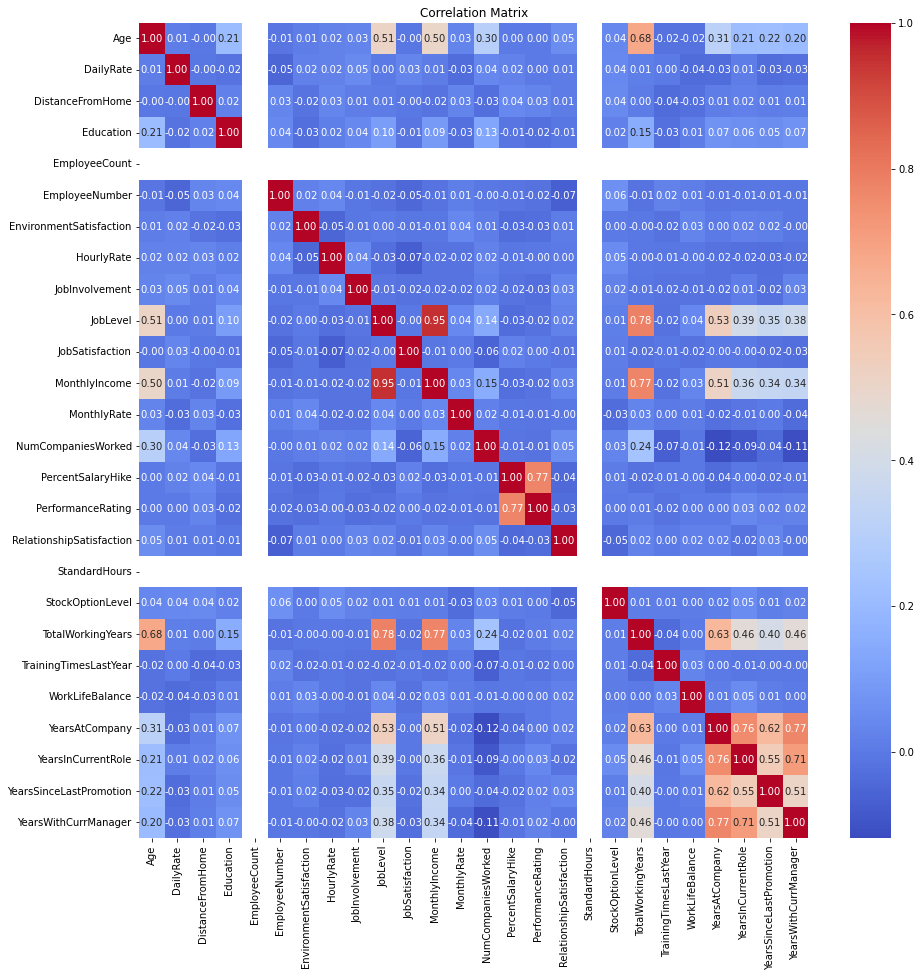

In [43]:
# correlation analysis calculate the correlation matrix
correlation_matrix = df.corr()

# plot the correlation matrix (heatmap)
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix')
plt.show()

### Exploratory Analysis